# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

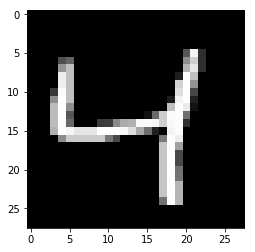

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this  ([`tf.nn.sigmoid_cross_entropy_with_logits`](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
image_size = mnist.train.images.shape[1] # MNIST data input (img shape: 28*28)

input_ = tf.placeholder("float", [None, image_size]) 
labels = tf.placeholder("float", [None, image_size]) 


# Output of hidden layer, single fully connected layer here with ReLU activation
hidden_encoded = tf.layers.dense(input_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(hidden_encoded, image_size)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

# Sigmoid output from logits
output_decoded = tf.nn.sigmoid(logits)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {input_: batch[0], labels: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6952
Epoch: 1/20... Training loss: 0.6922
Epoch: 1/20... Training loss: 0.6893
Epoch: 1/20... Training loss: 0.6864
Epoch: 1/20... Training loss: 0.6832
Epoch: 1/20... Training loss: 0.6788
Epoch: 1/20... Training loss: 0.6740
Epoch: 1/20... Training loss: 0.6677
Epoch: 1/20... Training loss: 0.6604
Epoch: 1/20... Training loss: 0.6517
Epoch: 1/20... Training loss: 0.6425
Epoch: 1/20... Training loss: 0.6318
Epoch: 1/20... Training loss: 0.6197
Epoch: 1/20... Training loss: 0.6057
Epoch: 1/20... Training loss: 0.5922
Epoch: 1/20... Training loss: 0.5755
Epoch: 1/20... Training loss: 0.5595
Epoch: 1/20... Training loss: 0.5405
Epoch: 1/20... Training loss: 0.5196
Epoch: 1/20... Training loss: 0.5052
Epoch: 1/20... Training loss: 0.4861
Epoch: 1/20... Training loss: 0.4703
Epoch: 1/20... Training loss: 0.4487
Epoch: 1/20... Training loss: 0.4336
Epoch: 1/20... Training loss: 0.4160
Epoch: 1/20... Training loss: 0.4005
Epoch: 1/20... Training loss: 0.3886
E

Epoch: 1/20... Training loss: 0.1803
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1983
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1869
E

Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1450
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1507
E

Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1341
E

Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1194
E

Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1142
E

Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1045
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1086
E

Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1001
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1057
E

Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.0936
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1017
E

Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1006
E

Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0976
E

Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0914
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0935
E

Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.1014
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0908
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0988
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0996
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0887
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0983
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0878
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0874
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

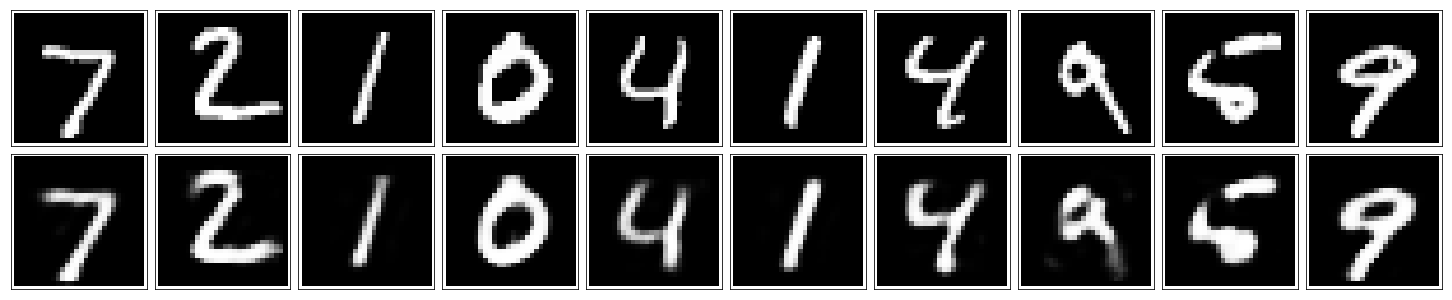

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([output_decoded, hidden_encoded], feed_dict={input_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.